***SOLUCIÓN ACTIVIDAD MODULO 10***:

***Nombre:*** Juan Diego Vargas Mesa

***CC*** 1013099612



In [1]:
#PRIMERO INSTALAMOS SODAPY

!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [2]:
#Importamos las librerias que vamos a necesitar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata

**Punto 1:** Cargamos el dataset con sodapy que nos permite traer datos desde un cliente.

In [3]:
client= Socrata('www.datos.gov.co', None)

result= client.get('32sa-8pi3')
df= pd.DataFrame.from_records(result)

df.head()

,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000


**Punto 2:** Calculamos la media, mediana, deviación estandar, maximo, minimo y rango de los datos que están en la columna 'valor' que representan el valor del dolar en COP

In [4]:
# Pasamos la columna valores a datos float para que puedan ser calculables
# Para esto usamos 'astype' de numpy que nos sirve para cambiar el tipo del dato y ademas los ponemos como un dataframe

valorn= pd.DataFrame(df['valor'].astype(float))

# Usamos los metodos estadisticos para calcular los datos que nos están pidiendo
print('La MEDIA de los datos en la columna valor es:', round(valorn.values.mean(),3))
print('La MEDIANA de los datos en la columna valor es:', round(np.median(valorn),3))
print('La DESVIACION ESTANDAR de los datos en la columna valor es:', round(valorn.values.std(),3))
print('El valor MAXIMO de los datos en la columna valor es:', round(valorn.values.max(),3))
print('El valor MINIMO de los datos en la columna valor es:', round(valorn.values.min(),3))
print('El RANGO de los datos en la columna valor es:', round(valorn.values.max()-valorn.values.min(),3))

La MEDIA de los datos en la columna valor es: 3042.377
La MEDIANA de los datos en la columna valor es: 2972.525
La DESVIACION ESTANDAR de los datos en la columna valor es: 730.324
El valor MAXIMO de los datos en la columna valor es: 5061.21
El valor MINIMO de los datos en la columna valor es: 1846.12
El RANGO de los datos en la columna valor es: 3215.09


**Punto 3:** Resumen de los datos numericos

In [5]:
# Primero remplazo la columna 'valor' con los datos que ya están en un tipo calculable como lo es float
df['valor']= valorn

# Simplemente usando el metodo '.describe' podriamos ver un resumen de los datos del dataframe
df.describe()


,valor
count,1000.000000
mean,3042.376510
std,730.689006
min,1846.120000
25%,2500.497500
50%,2972.525000
75%,3646.340000
max,5061.210000


**Punto 4:** Descripción del DataFrame

In [6]:
# Usando '.info' obtenemos información acerca del dataframe como la cantidad de datos, filas, columnas, la clase, el tipo y si tiene datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   float64
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


**Punto 5:** Respresentaciones graficas de los datos

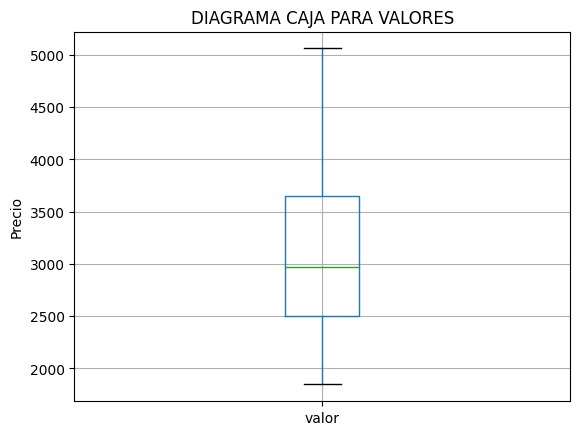

In [7]:
# Con la caja de bigotes podemos evidenciar que todos los datos se encuentran dentro de la desviación estandar lo que quieres decir que no hay datos atipicos

df.boxplot()
plt.title('DIAGRAMA CAJA PARA VALORES')
plt.ylabel('Precio')
plt.show()

**ANALISIS**
Con la caja de bigotes podemos evidenciar que todos los datos se encuentran dentro de la desviación estandar lo que quieres decir que no hay datos atipicos y que la mayor parte del tiempo el dolara rondó ente los 2500 y los 3600


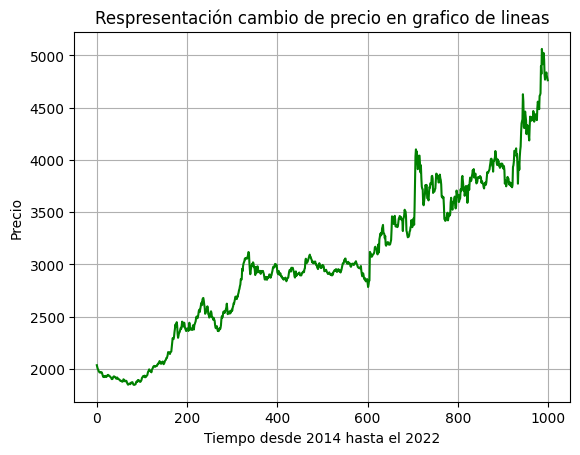

In [8]:
# Para hacer el diagrama de lineas primero organizaremos los datos desde la fecha más antigua hasta la más reciente
data_o=df.sort_values(by=['vigenciadesde'])
# Luego lo ponemos en una variable como una lista para solo tener los valores sin los index
valor_o= list(data_o['valor'])

#Ahora con el grafico de lineas podemos evidenciar que el dolar ha estado subiendo con gran diferencia entre marzo del 2014 hasta diciembre del 2022
plt.plot(valor_o, color= 'green')
plt.title('Respresentación cambio de precio en grafico de lineas')
plt.ylabel('Precio')
plt.xlabel('Tiempo desde 2014 hasta el 2022')
plt.grid()
plt.show()



**ANALISIS**
Ahora con el grafico de lineas podemos evidenciar que el dolar ha estado subiendo con gran diferencia entre marzo del 2014 hasta diciembre del 2022, notando que hay ocaciones donde este sube de manera repentina y en gran cantidad.

**Punto 6:** Cargando datos desde el portal de datos publicos de colombia con socrata

In [190]:
# Con socrata especificamos el cliente y guardamos los datos en unas variable
# En este caso usaremos una base de datos que contiene los suicidios que se presentaron en Neiva desde 2014 al 2022 y algunas caracteristicas
#https://www.datos.gov.co/Estad-sticas-Nacionales/SUICIDIOS-2014-MARZO-2022-NEIVA/gh4e-xuyg

client2= Socrata('www.datos.gov.co', None)

result2= client.get('gh4e-xuyg')
sui_df= pd.DataFrame.from_records(result2)

sui_df

,fecha_del_hecho,dia_de_la_semana,hora_del_hecho_hh_mm,comuna_corregimiento,area_del_hecho,clase_de_area_hecho,genero,edad,mecanismo_muerte,evento_relacionado_con_el
0,2014-05-21T00:00:00.000,miércoles,0,1,Zona Urbana,Casa,Masculino,71,Ahorcamiento,Sin Dato
1,2014-06-03T00:00:00.000,martes,0,7,Zona Urbana,Casa,Masculino,15,Ahorcamiento,Sin Dato
2,2014-06-06T00:00:00.000,viernes,0,4,Zona Urbana,Sin Dato,Masculino,32,Intoxicación,Sin Dato
3,2014-06-16T00:00:00.000,lunes,0,Vegalarga,Zona Rural,Finca o Campo Abierto,Masculino,49,Ahorcamiento,Conflicto con la Pareja
4,2014-06-26T00:00:00.000,jueves,0,10,Zona Urbana,Casa,Femenino,20,Ahorcamiento,Sin Dato
...,...,...,...,...,...,...,...,...,...,...
182,2022-01-26T00:00:00.000,miercoles,1899-12-31T13:50:00.000,1,Zona Urbana,Casa,Masculino,69,Ahorcamiento,Sin Dato
183,2022-02-14T00:00:00.000,martes,1899-12-31T11:55:00.000,6,Zona Urbana,Casa,Masculino,56,Ahorcamiento,Sin Dato
184,2022-02-17T00:00:00.000,Jueves,1899-12-31T21:30:00.000,4,Zona Urbana,Sin Dato,Masculino,60,Ahorcamiento,Sin Dato
185,2022-02-21T00:00:00.000,Lunes,1899-12-31T16:30:00.000,6,Zona Urbana,Casa,Masculino,86,Arma de Fuego,Otro Tipo de Eventos


**Punto 7:** Limpieza y transformación.

In [ ]:
# Observamos que no contamos con datos nulos
sui_df.info()

In [50]:
# Por lo tanto el unico cambio que le haremos al DataFrame antes de empezar a analizarlo será el cambio de tipo de edad por datos de dipo int
sui_df['edad']=(sui_df['edad'].astype(int))
sui_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   fecha_del_hecho            187 non-null    object
 1   dia_de_la_semana           187 non-null    object
 2   hora_del_hecho_hh_mm       187 non-null    object
 3   comuna_corregimiento       187 non-null    object
 4   area_del_hecho             187 non-null    object
 5   clase_de_area_hecho        187 non-null    object
 6   genero                     187 non-null    object
 7   edad                       187 non-null    int64 
 8   mecanismo_muerte           187 non-null    object
 9   evento_relacionado_con_el  187 non-null    object
dtypes: int64(1), object(9)
memory usage: 14.7+ KB


In [51]:
# Observamos que mi DF no cuenta con datos duplicados
con=0
for i in sui_df.duplicated():
  if i == True:
    con+=1
print(con)

0


**PUNTO 8:** Estadistica

In [61]:
sui_df.describe()

,edad
count,187.000000
mean,38.000000
std,19.305969
min,11.000000
25%,22.000000
50%,32.000000
75%,51.500000
max,93.000000


In [63]:
sui_df['edad'].std()

19.305968768946222

In [73]:
# Por lo tanto comenzaremos a usar metodos estadisticos en el data frame

print('La MEDIA de edad de suicidio en nevia es de:', int(sui_df['edad'].values.mean()), 'años')
print('La MEDIANA de los datos en la columna EDAD es:', int(np.median(sui_df['edad'])), 'años')
print('La DESVIACION ESTANDAR de los datos en la columna EDAD es:', round(sui_df['edad'].std(),3))
print('La edad MAXIMA de suicidio en el DataFrame es:', int(sui_df['edad'].values.max(),), 'años')
print('La edad MINIMA de suicidio en el DataFrame es:', int(sui_df['edad'].values.min(),), 'años')
print('El RANGO de los datos en la columna valor es:', int(sui_df['edad'].values.max()-sui_df['edad'].values.min()))

La MEDIA de edad de suicidio en nevia es de: 38 años
La MEDIANA de los datos en la columna EDAD es: 32 años
La DESVIACION ESTANDAR de los datos en la columna EDAD es: 19.306
La edad MAXIMA de suicidio en el DataFrame es: 93 años
La edad MINIMA de suicidio en el DataFrame es: 11 años
El RANGO de los datos en la columna valor es: 82


**ANALISIS VALORES ESTADISTICOS EN EDAD**

Algunos pensarían que el suicidio se ve más presente en la adolescencia, sin embargo podemos notar que en neiva en el periodo 2014-2022 la edad donde hubo mas suicidios fue al rededor de los 38 años.

No obstante el suicidio está presente en un amplio rango de edad(82), donde podemos evidenciar que la persona más joven que cometio un suicidio era de tan solo 11 años y la mayor de 93

La cantidad de MUJERES que cometieron suicidio entre 2014 y 2022 fueron: 27
La cantidad de HOMBRES que cometieron suicidio entre 2014 y 2022 fueron: 160


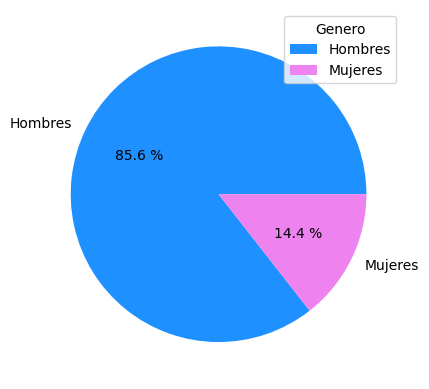

Hombres    160
Mujeres     27
dtype: int64

In [106]:
# Haremos un conteo por genero para asi obtener información sobre el genero que más comete suicidio
con_muj=0
con_hom=0
for i in sui_df['genero']:
  if i == 'Femenino':
    con_muj+=1
  else:
    con_hom+=1

print('La cantidad de MUJERES que cometieron suicidio entre 2014 y 2022 fueron:', con_muj)
print('La cantidad de HOMBRES que cometieron suicidio entre 2014 y 2022 fueron:', con_hom)

# Pongo en una serie los valores que sacamos a base del conte para asi poder graficarlo

gener_sui=pd.Series({'Hombres':con_hom,'Mujeres': con_muj})
color=['dodgerblue','violet']

plt.pie(gener_sui, labels= gener_sui.index, autopct="%0.1f %%", colors= color)
plt.legend(title = 'Genero')
plt.show()

gener_sui

**ANALISIS**

Luego de haber hecho el conteo y graficar podemos evidenciar que con una amplia diferencia son los hombres quienes más cometen suicidio con un 85,6% del total del los datos a diferencia de las mujeres quienes son el 14,4% del total de los datos.

**ANALISIS DESDE CHAT GPT**

Comparación por género:
Los datos indican que la cantidad de suicidios en hombres es mucho mayor que en mujeres. Esto es coherente con las tendencias globales, donde los hombres tienden a tener tasas más altas de suicidio en comparación con las mujeres.

In [124]:
# Primero hacemos una función de contar los valores para luego agregarlos en una lista
def contar(n, vec):
  count=0
  for i in vec:
    if i==n:
      count+=1
  return count

In [132]:
# Creamos una lista con el conteo de las fomas en que se cometio el suicidio

form=[contar('Ahorcamiento', sui_df['mecanismo_muerte']), contar('Arma de Fuego', sui_df['mecanismo_muerte']),
      contar('Corte',sui_df['mecanismo_muerte']), contar('Intoxicación', sui_df['mecanismo_muerte']),
      contar('Lanzamiento al Vacío',sui_df['mecanismo_muerte']), contar('Otro Medios',sui_df['mecanismo_muerte'])]

print(form)

[143, 17, 2, 19, 4, 2]


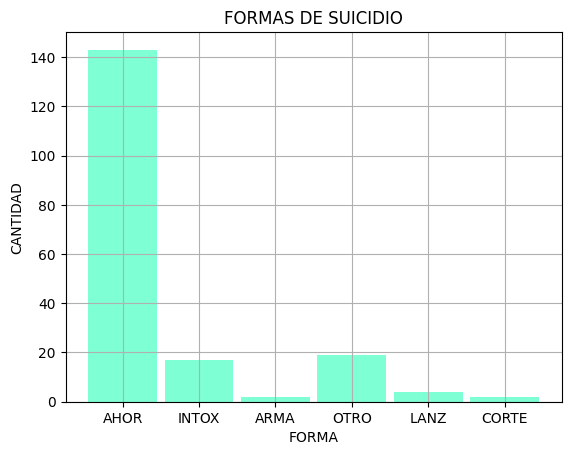

--------------------------------------------------------------------------------
De los 187 suicidios 143 fueron por AHORCAMIENTO
De los 187 suicidios 17 fueron por INTOXICACIÓN
De los 187 suicidios 2 fueron con ARMA DE FUEGO
De los 187 suicidios 19 fueron con OTRO METODO
De los 187 suicidios 4 fueron por LANZAMIENTO
De los 187 suicidios 2 fueron por CORTE


In [148]:
# Vamos a hacer un analisis de la forma en la que se comete el suicidio
name=['AHOR', 'INTOX', 'ARMA', 'OTRO', 'LANZ', 'CORTE']
plt.bar(name, form,width=0.9, color='aquamarine')
plt.title('FORMAS DE SUICIDIO')
plt.grid()
plt.ylabel('CANTIDAD')
plt.xlabel('FORMA')
plt.show()
print('--------------------------------------------------------------------------------')
print('De los 187 suicidios',form[0], 'fueron por AHORCAMIENTO' )
print('De los 187 suicidios',form[1], 'fueron por INTOXICACIÓN' )
print('De los 187 suicidios',form[2], 'fueron con ARMA DE FUEGO' )
print('De los 187 suicidios',form[3], 'fueron con OTRO METODO' )
print('De los 187 suicidios',form[4], 'fueron por LANZAMIENTO' )
print('De los 187 suicidios',form[5], 'fueron por CORTE' )

**ANALISIS**

Podemos notar que el metodo mas usado para cometer suicidios es mediante el ahorcamiento con un registro de 143 casos mientras que el corte y el arma de fuego fueron los menos presentes dentro de los datos con solo 2 registros para cada uno.

Es de notar que hay 19 registros que fueron suicidio con otro metodo que desconocemos y que considero que seria interesante hacer una investigación respecto a ese otro metodo para asi estar alertas y prevenir.

***PUNTO 9: TABLAS PIVOTE Y AGRUPACIÓN***

**COMUNAS Y CORREGIMIENTO DE NEIVA**

Según la investigación que hice neiva cuenta con comunas que estan enumeradas como las localidades de bogotá, estas se enumeran asi:

1. Comuna Noroccidental.
2. Comuna Nororiental.
3. Comuna Entre Ríos.
4. Comuna Central.
5. Comuna Oriental.
6. Comuna Sur.
7. Comuna La Floresta.
8. Comuna Suroriental.
9. Comuna Norte.
10. Comuna Las Palmas.

Y además cuenta con 8 corregimientos solo que estos ya no están enumerados es por esto que no aparecian como números en el DataFrame, los corregimientos son los siguientes:
- Aipecito
- Chapinero
- San Luis
- Guacirco
- Fortalecillas
- El Caguán
- Vegalarga
- Río de las Ceibas

In [149]:
# Iniciaremos con la tabla de agrupación donde podriamos ver la comuna o corregimiento donde ocurrio el suicidio
# En el DataFrame los lugares aparecen como un numero que representan una comuna como se explico anteriormente y los corregimientos aparecen con nombre
# Para esto usaremos el metodo de agrupación que nos ayudará a hacer el conteo de los casos que se registraron en dicho lugar

sui_df.groupby(sui_df['comuna_corregimiento']).count()[['genero']]

,genero
comuna_corregimiento,
1,17
10,22
2,13
3,17
4,15
5,15
6,32
7,11
8,15


**ANALISIS**

Se evidencia que el lugar donde más suicidios se presentaron fue en la COMUNA SUR (6) esta es la comuna mas extensa de neiva lo que podria ser una de las razones por las que tiene más registros (32) sin embargo tambien hay que tener en cuenta el estrato socio-economico del lugar y el contexto social en general, a esta le sigue la COMUNA LAS PALMAS que cuenta con 22 registos.

Tambien podemos ver que FORTALECILLAS es el lugar con menos suicidios con tan solo 1 registo en 6 años.

In [203]:
# Antes vamos a remplazar unos valores que representan lo mismo pero están escritos de distinta manera entonces los toma como algo distinto
sui_df.head()
sui_df['evento_relacionado_con_el'] = sui_df['evento_relacionado_con_el'].replace('Conflicto con la pareja', 'Conflicto con la Pareja')
sui_df['evento_relacionado_con_el'] = sui_df['evento_relacionado_con_el'].replace('Conflictos con la pareja', 'Conflicto con la Pareja')

In [205]:
# Y ahora si procedemos a hace la tabla pivote
sui_df.pivot_table(values='edad', index= 'genero', columns=['evento_relacionado_con_el'], aggfunc= 'count')

evento_relacionado_con_el,Conflicto con la Familia,Conflicto con la Pareja,Crisis Económica,Duelo Reciente,Otro Tipo de Eventos,Problemas Escolares,Sin Dato
genero,,,,,,,
Femenino,1.0,6.0,2.0,NaN,11.0,3.0,4.0
Masculino,9.0,32.0,10.0,2.0,60.0,NaN,47.0


**ANALISIS**

Sin contar aquellos caso donde no tenemos conocimiento sobre la causa del suicidio podemos notar que en los hombres uno de los factores más detonantes a la hora del suicidio fue algún conflicto con la pareja mientras que pareja mientras que si bien si hay suicidios esta razón en las mujeres no se ve tan marcada como si pasa en los hombre.

Tambien se debe tener en cuenta que hay muchos suicidios de los cuales desconocemos la causa.

Se considera importante la información respeto al manejo de emociones para asi lograr que cada vez estos registros vayan bajando, quizas es utopico pensar en erradicar el suicidio en un 100% sin embargo nunca está de más brindar ayuda y atención a aquellos que están pasando por un momento de caos en sus mentes y que pueden estár a tiempo de ser salvados.


***FIN***